In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0'

In [4]:
conda install -c conda-forge matplotlib

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
from pandas.io.parsers import read_csv

In [28]:
data = read_csv("D:\ckgoung_data.csv", sep=",")

In [29]:
xy = np.array(data, dtype=np.float32)

In [30]:
data.head(3)

year  avgTemp  minTemp  maxTemp  rainFall  holiday  jan  feb  mar  apr  \
0  20090101     -5.8     -9.5     -2.5       0.0      1.2    1    0    0    0   
1  20090102     -2.8     -6.9      1.2       0.0      1.2    1    0    0    0   
2  20090103     -1.0     -5.6      4.0       0.0      1.2    1    0    0    0   

   may  jun  jul  aug  sep  oct  nov  dec  result  
0    0    0    0    0    0    0    0    0    1064  
1    0    0    0    0    0    0    0    0     859  
2    0    0    0    0    0    0    0    0    1338

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = xy[:,1:-1]

In [33]:
y = xy[:, -1]

In [34]:
data.head(5)

year  avgTemp  minTemp  maxTemp  rainFall  holiday  jan  feb  mar  apr  \
0  20090101     -5.8     -9.5     -2.5       0.0      1.2    1    0    0    0   
1  20090102     -2.8     -6.9      1.2       0.0      1.2    1    0    0    0   
2  20090103     -1.0     -5.6      4.0       0.0      1.2    1    0    0    0   
3  20090104      0.4     -2.8      4.5       0.0      1.0    1    0    0    0   
4  20090105     -1.6     -3.4      1.2       0.0      0.0    1    0    0    0   

   may  jun  jul  aug  sep  oct  nov  dec  result  
0    0    0    0    0    0    0    0    0    1064  
1    0    0    0    0    0    0    0    0     859  
2    0    0    0    0    0    0    0    0    1338  
3    0    0    0    0    0    0    0    0    1248  
4    0    0    0    0    0    0    0    0     590

In [35]:
df_cor = data.corr()

In [36]:
df_cor.style.background_gradient(cmap="coolwarm").set_precision(3)

In [37]:
xy.shape

(4167, 19)

In [38]:
cor_target=abs(df_cor['result'])

In [39]:
relevant_features = cor_target[cor_target>0.04].index.values.tolist()

In [40]:
df_fin=data[relevant_features]

In [41]:
df_fin.head(3)

year  avgTemp  minTemp  maxTemp  rainFall  holiday  jan  feb  mar  apr  \
0  20090101     -5.8     -9.5     -2.5       0.0      1.2    1    0    0    0   
1  20090102     -2.8     -6.9      1.2       0.0      1.2    1    0    0    0   
2  20090103     -1.0     -5.6      4.0       0.0      1.2    1    0    0    0   

   may  jun  jul  sep  oct  nov  dec  result  
0    0    0    0    0    0    0    0    1064  
1    0    0    0    0    0    0    0     859  
2    0    0    0    0    0    0    0    1338

In [42]:
xy[0:3, :]

array([[ 2.0090100e+07, -5.8000002e+00, -9.5000000e+00, -2.5000000e+00,
         0.0000000e+00,  1.2000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  1.0640000e+03],
       [ 2.0090102e+07, -2.8000000e+00, -6.9000001e+00,  1.2000000e+00,
         0.0000000e+00,  1.2000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  8.5900000e+02],
       [ 2.0090104e+07, -1.0000000e+00, -5.5999999e+00,  4.0000000e+00,
         0.0000000e+00,  1.2000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x = xy[:,1:-1]

In [45]:
y = xy[:,-1]

In [46]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [47]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all,y_train_all, test_size=0.2, random_state=42)

In [48]:
y

array([1064.,  859., 1338., ..., 3288., 1075., 1085.], dtype=float32)

In [49]:
from sklearn.linear_model import LinearRegression as LR

In [50]:
df_fit = LR().fit(x_train, y_train)

In [51]:
y_pred = df_fit.predict(x_test)

In [52]:
import matplotlib.pyplot as plt

In [53]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

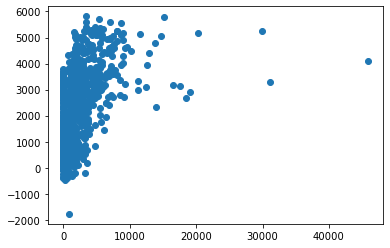

In [54]:
plt.scatter(y_test,y_pred)

In [55]:
plt.show()

In [56]:
a = np.array([[20,20,20,0,1.2,0,0,0,0,0,0,0,1,0,0,0,0]])

In [57]:
print(df_fit.predict(a))

[2013.61644897]
